# **AGRICULTURE**

# **Problem Statement**
## The Toxic Pesticides

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Trainagriculture.csv to Trainagriculture (1).csv


In [ ]:
import io
ag= pd.read_csv(io.BytesIO(uploaded['Trainagriculture.csv']))

In [ ]:
ag

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [ ]:
ag.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
ag.shape

(4599, 10)

In [ ]:
ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [ ]:
ag.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

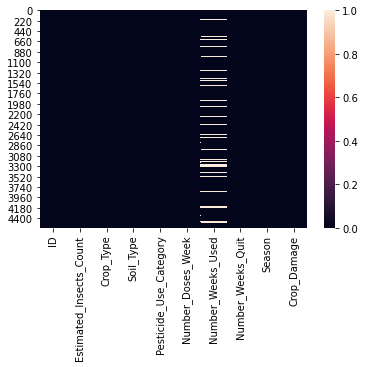

In [ ]:
sns.heatmap(ag.isnull())

In [ ]:
ag['Number_Weeks_Used'] = ag['Number_Weeks_Used'].replace(np.nan, 0)

In [ ]:
ag

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,0.0,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [ ]:
ag.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [ ]:
#we don't need ID column , so we have to drop it
ag= ag.drop('ID',axis=1)

In [ ]:
#check dataset again
ag.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
ag.shape

(4599, 9)

In [ ]:
ag.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,26.114373,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,14.686945,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,17.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [ ]:
#cheking skewness
ag.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used         -0.007168
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

# **Exploratory Data Analysis**

**Univariate Analysis**

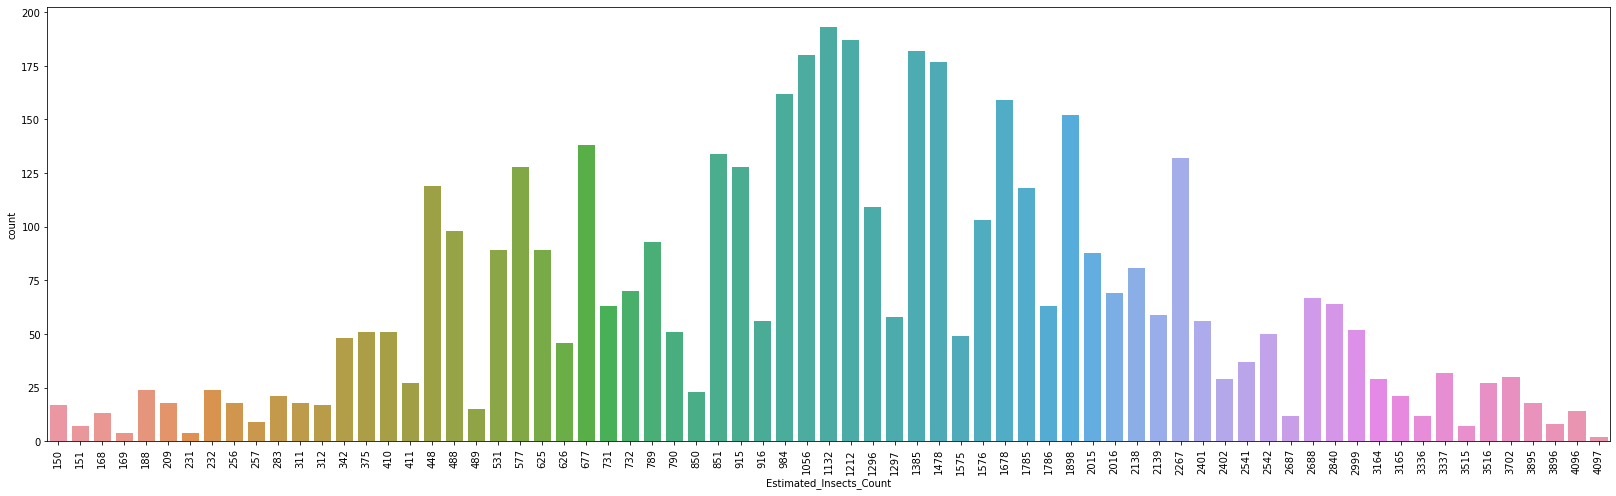

In [ ]:
#plotting the Estimated_Insects_Count column
plt.figure(figsize=(28,8))
sns.countplot(ag['Estimated_Insects_Count'])
plt.xticks(rotation=90)
plt.show()

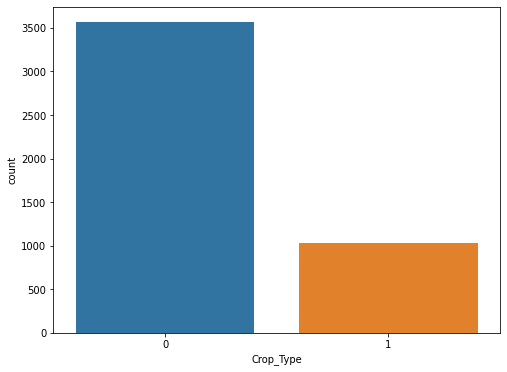

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(ag['Crop_Type'])
plt.show()

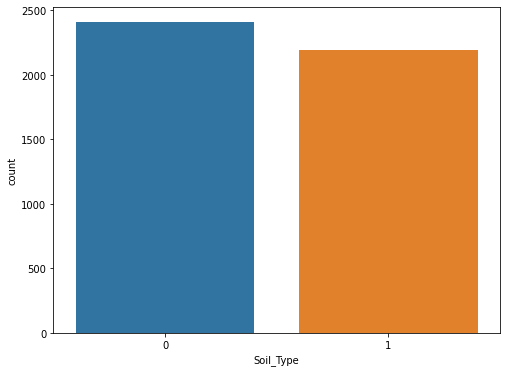

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(ag['Soil_Type'])
plt.show()

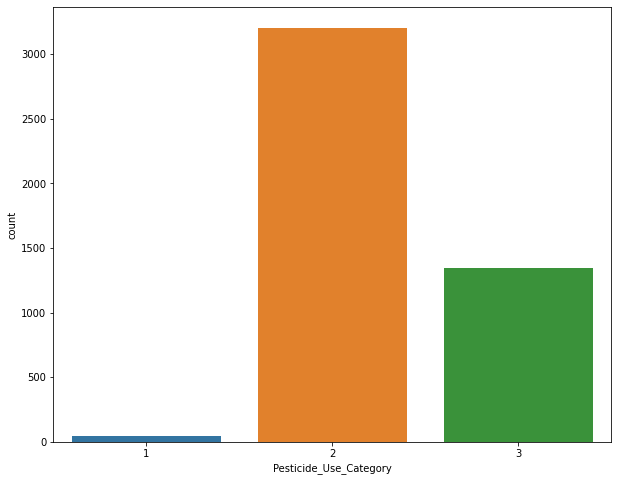

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(ag['Pesticide_Use_Category'])
plt.show()

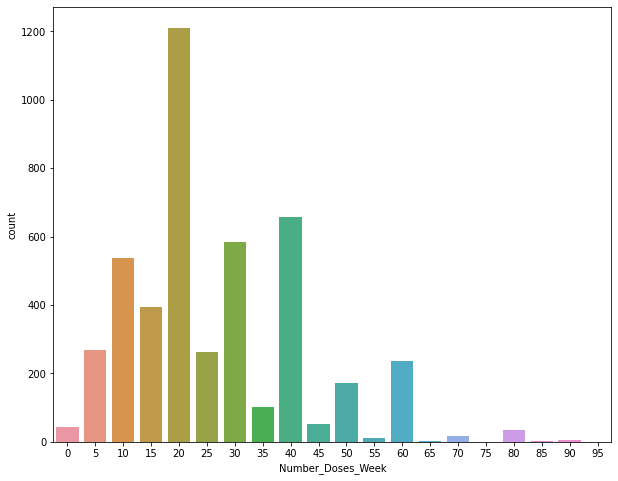

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(ag['Number_Doses_Week'])
plt.show()


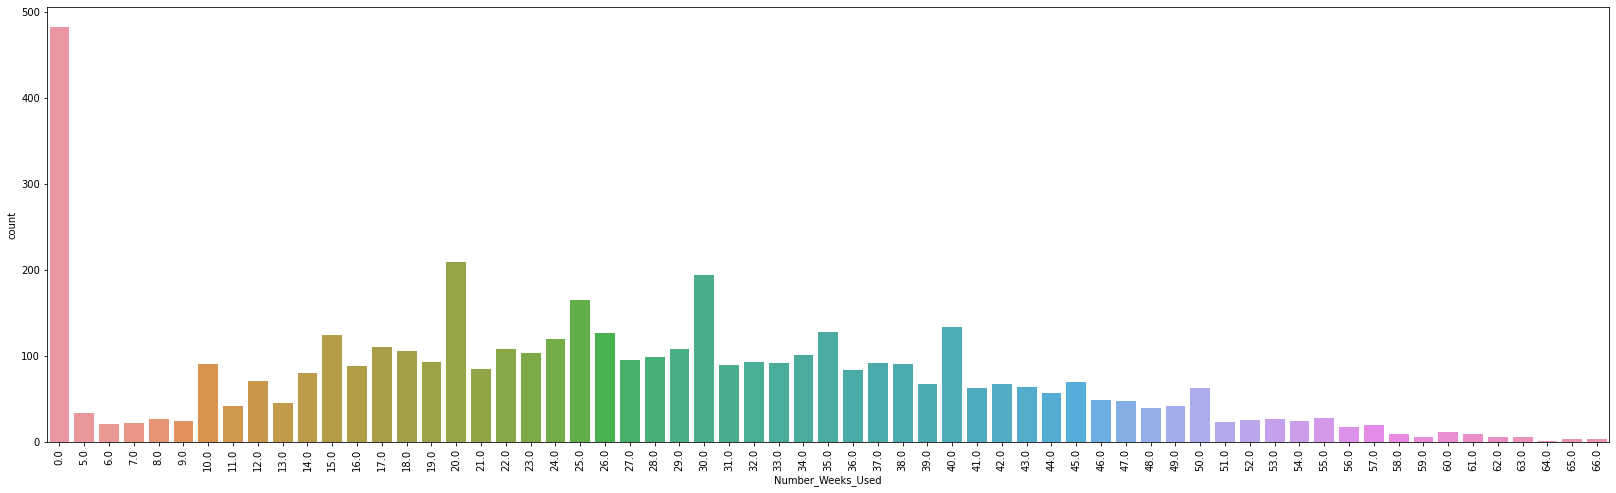

In [ ]:
plt.figure(figsize=(28,8))
sns.countplot(ag['Number_Weeks_Used'])
plt.xticks(rotation=90)
plt.show()

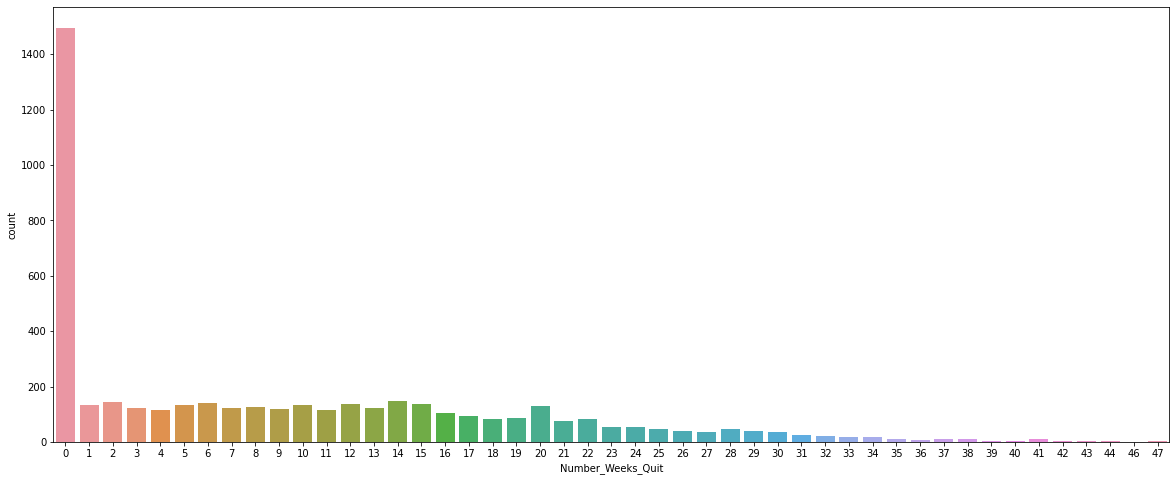

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(ag['Number_Weeks_Quit'])
plt.show()

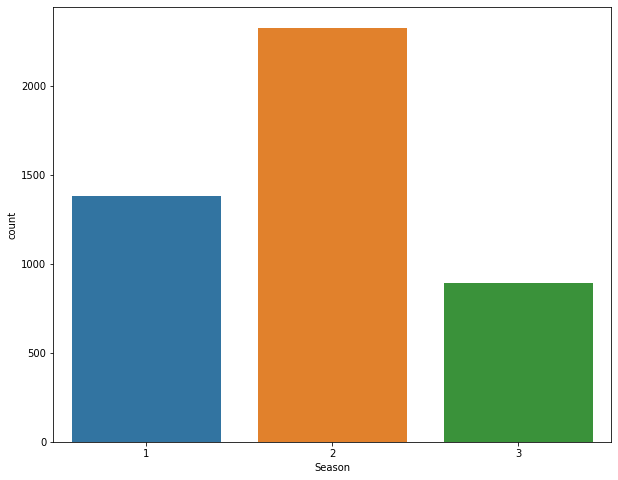

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(ag['Season'])
plt.show()

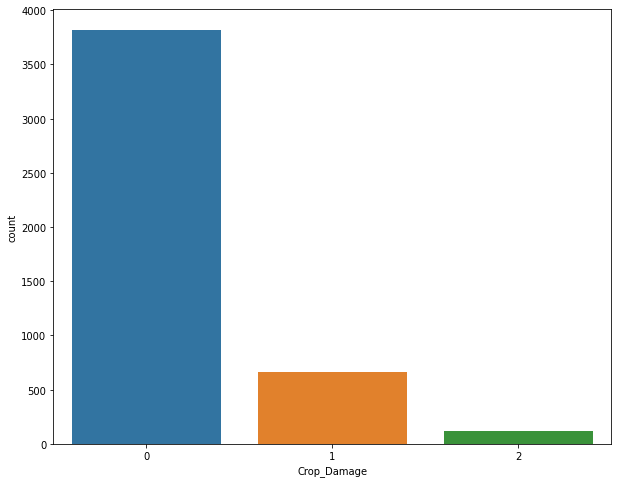

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(ag['Crop_Damage'])
plt.show()

Bivarate Analysis

<function matplotlib.pyplot.show>

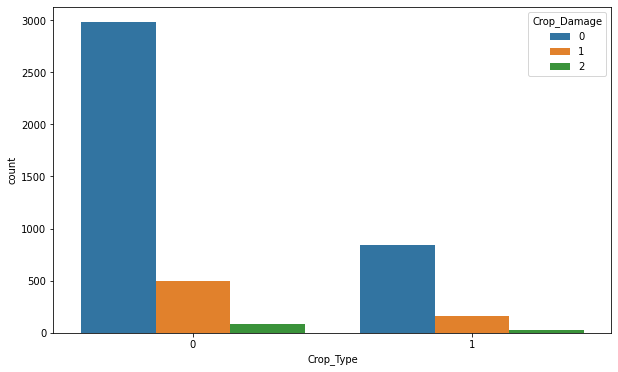

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=ag,)
plt.show

<function matplotlib.pyplot.show>

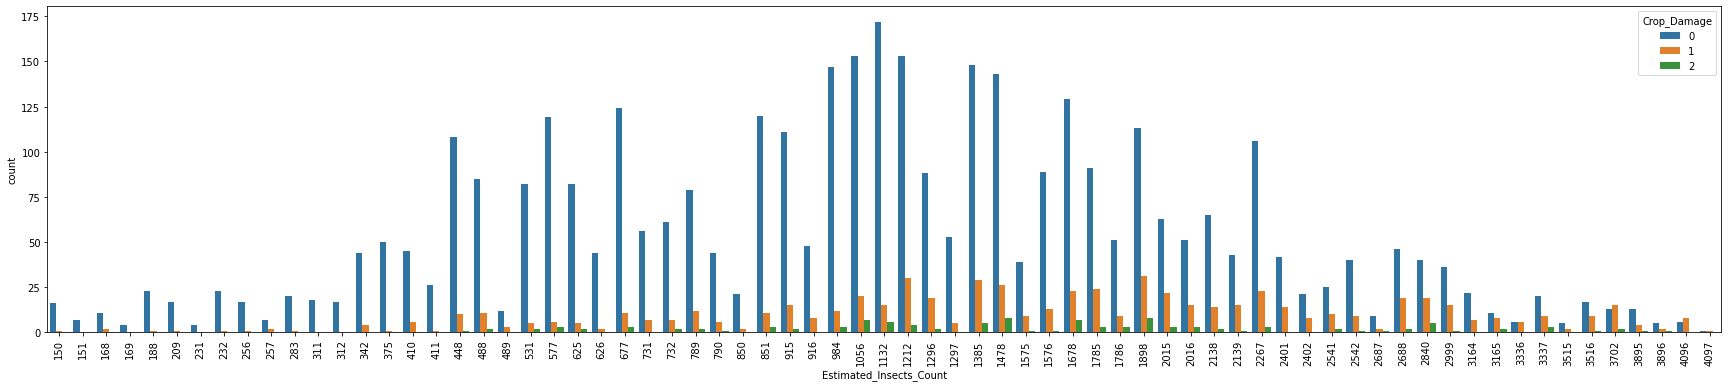

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Estimated_Insects_Count',hue='Crop_Damage',data=ag,)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show>

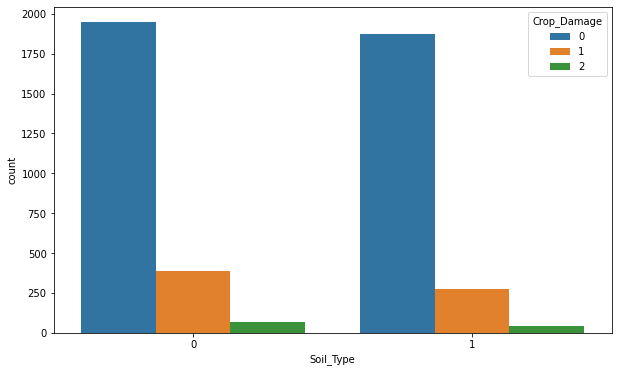

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=ag,)
plt.show

<function matplotlib.pyplot.show>

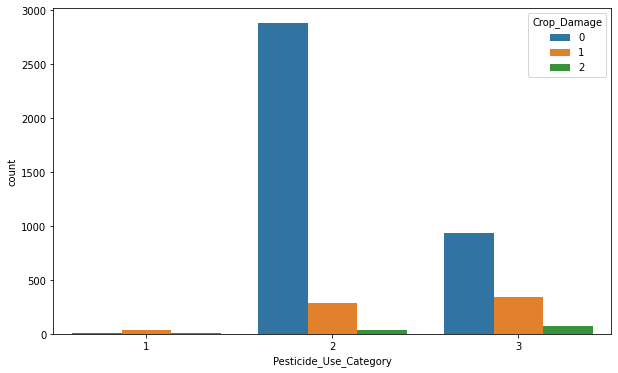

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=ag,)
plt.show

<function matplotlib.pyplot.show>

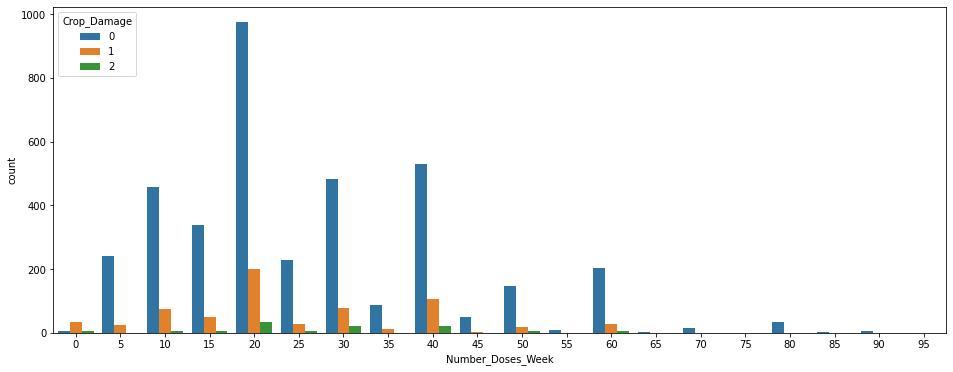

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='Number_Doses_Week',hue='Crop_Damage',data=ag,)
plt.show

<function matplotlib.pyplot.show>

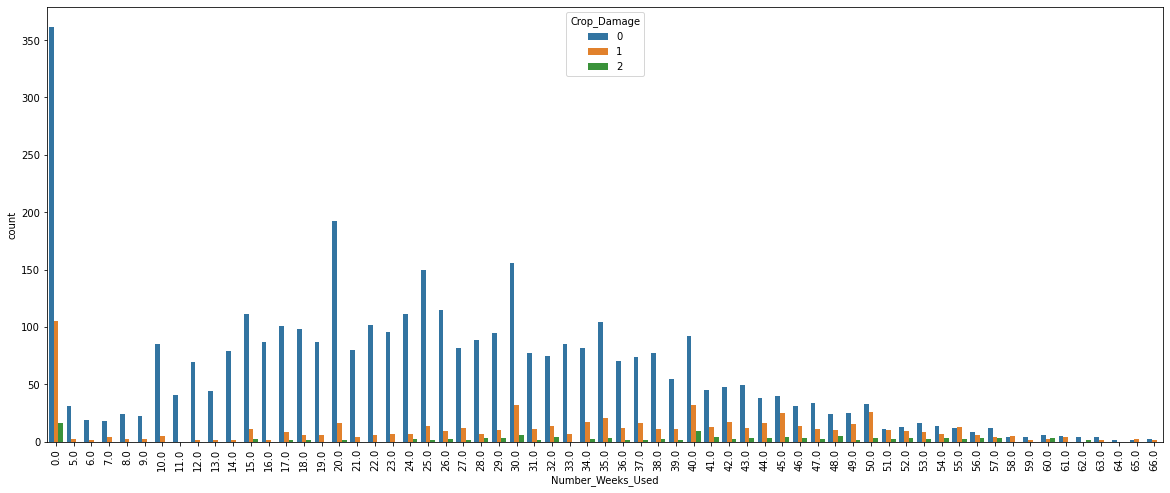

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Number_Weeks_Used',hue='Crop_Damage',data=ag,)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show>

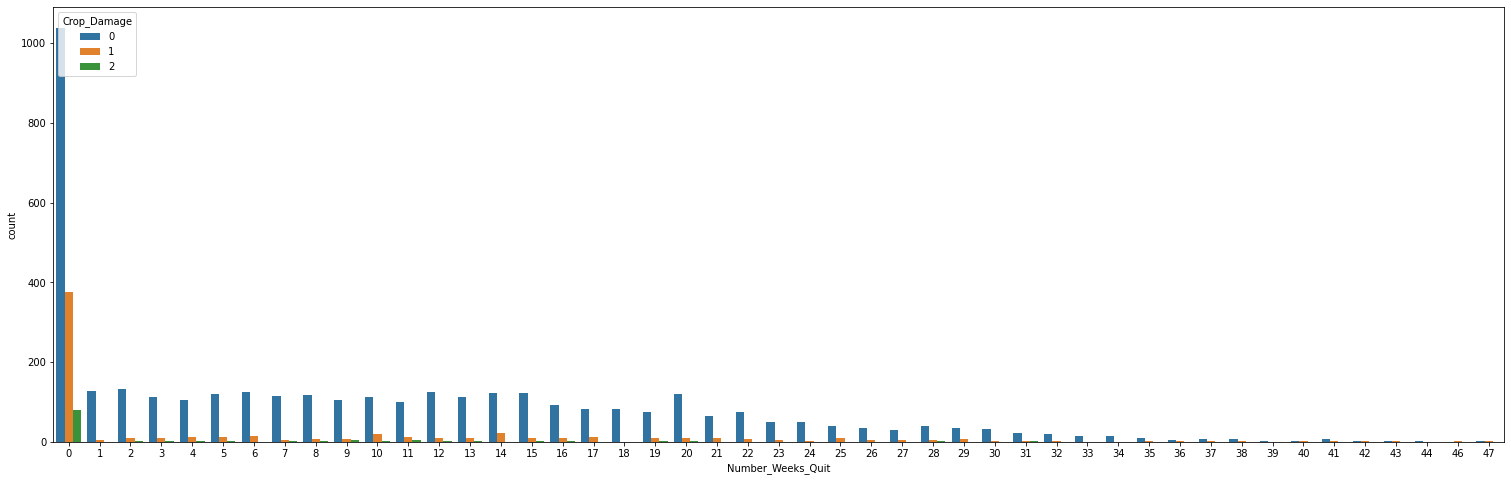

In [ ]:
plt.figure(figsize=(26,8))
sns.countplot(x='Number_Weeks_Quit',hue='Crop_Damage',data=ag,)
plt.show

<function matplotlib.pyplot.show>

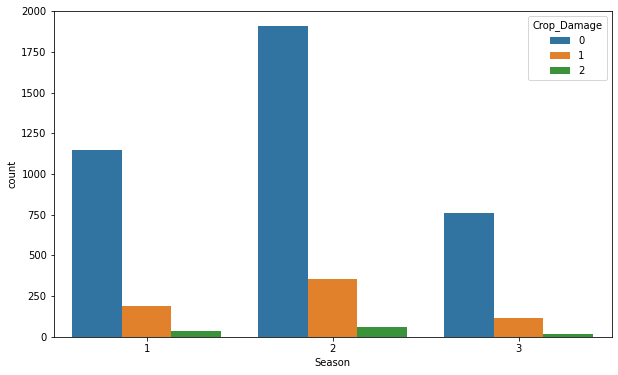

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Season',hue='Crop_Damage',data=ag,)
plt.show

Multivariate Analysis

In [ ]:
#checking correlation
agcorr = ag.corr()
agcorr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.360166,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,0.000700,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.080775,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.294760,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.087103,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.360166,0.000700,-0.080775,0.294760,0.087103,1.000000,-0.347417,-0.014605,0.177586
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.347417,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.014605,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.177586,-0.152918,-0.016196,1.000000


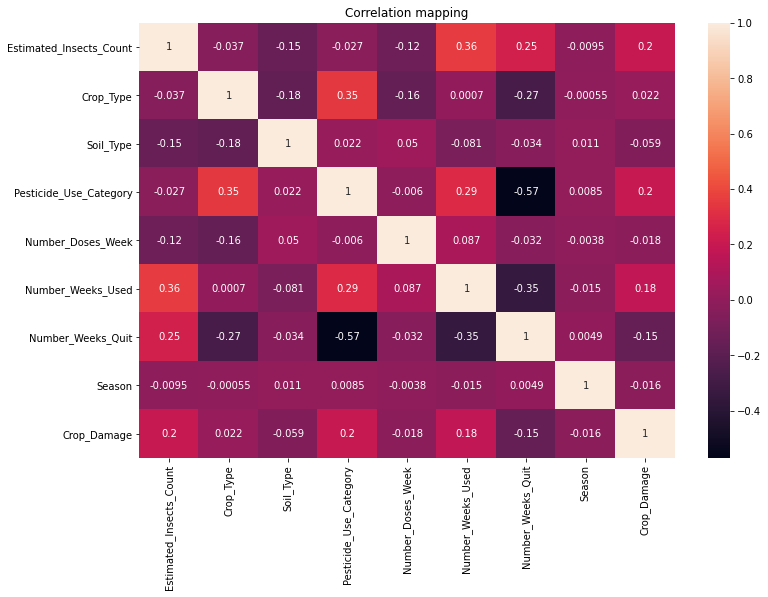

In [ ]:
#checking correlation using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(ag.corr(), annot = True)
plt.title('Correlation mapping')
plt.show()

**Checking skewness**

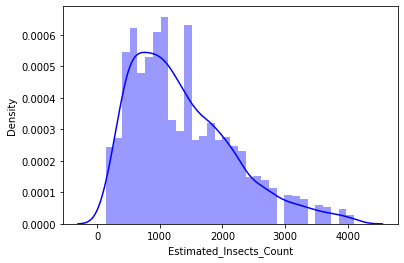

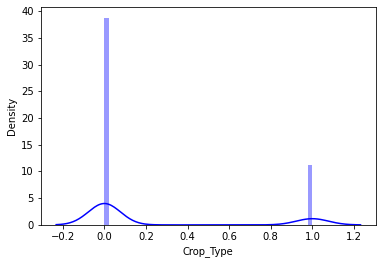

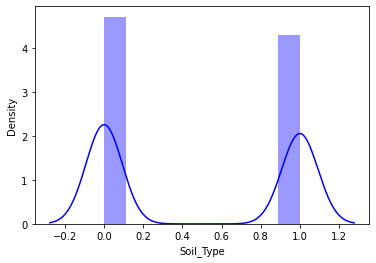

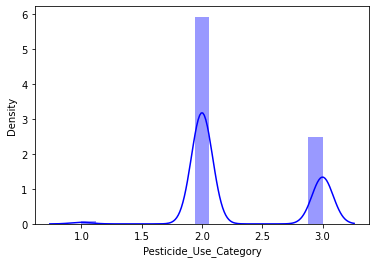

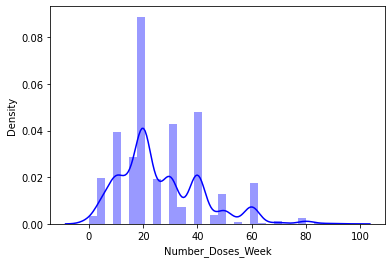

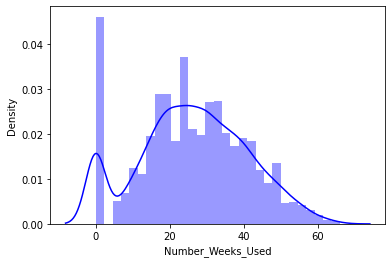

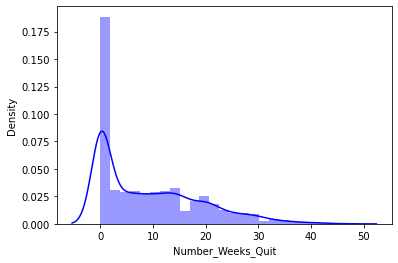

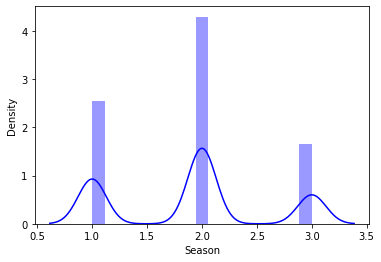

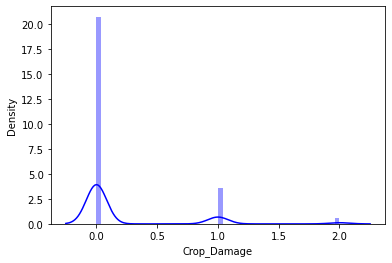

In [ ]:
#checking skewness using distplot
for col in ag.describe().columns:
  sns.distplot(ag[col],color='b')
  plt.show()

In [ ]:
ag.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used         -0.007168
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [ ]:
#treating skew via yeo-jhonson method
from sklearn.preprocessing import power_transform
x=power_transform(ag,method='yeo-johnson')

**Outliers**

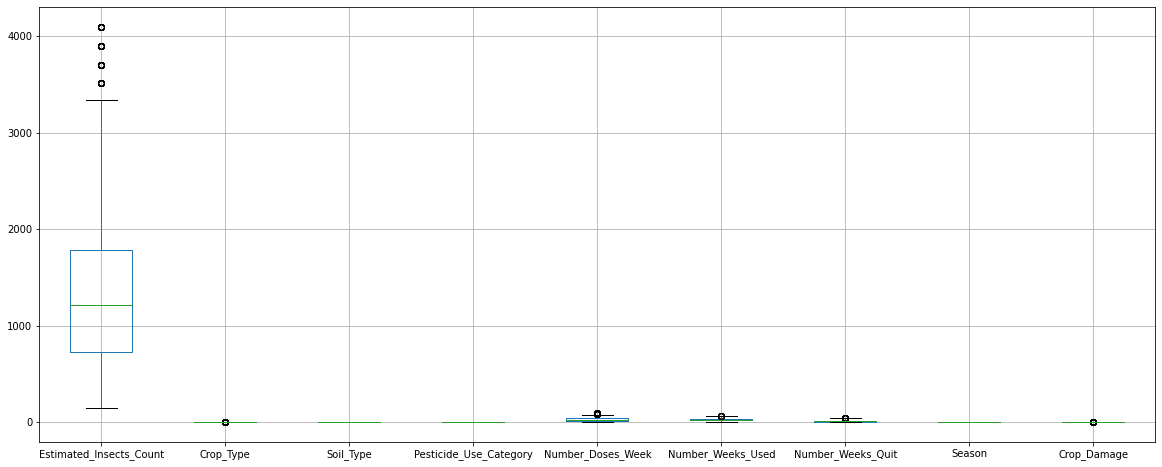

In [ ]:
#plotting Outliers
ag.boxplot(figsize=(20,8))

In [ ]:
#treating outliers using z score metod
from scipy.stats import zscore
z=np.abs(zscore(ag))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [ ]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  377,  384,  453,  458,  466,  480,  510,  517,  522,  557,
        595,  612,  634,  693,  702,  703,  704,  705,  706,  807,  819,
        855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067, 1097,
       1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339, 1340,
       1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183, 2185,
       2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553, 2565,
       2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702, 2710,
       2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814,
       2828, 2829, 2834, 2841, 2842, 2851, 2860, 2

In [ ]:
ag_new=ag[(z<3).all(axis=1)]

In [ ]:
print(ag.shape, '\n',ag_new.shape)

(4599, 9) 
 (4376, 9)


All outliers are Removed

# **Model building**

In [ ]:
#splitting data into input and output variable
x=ag_new.drop("Crop_Damage",axis=1) #separating independent and target variable
y=ag_new["Crop_Damage"]

In [ ]:
x.shape

(4376, 8)

In [ ]:
y.shape

(4376,)

In [ ]:
#scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
#Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#importing error metrics 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
#Splittinfg the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [ ]:
#All Algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
  m.fit(x_train,y_train)
  m.score(x_test,y_test)
  predm=m.predict(x_test)
  print('Accuracy score of',m,'is')
  print(accuracy_score(y_test,predm))
  print(confusion_matrix(y_test,predm))
  print('*********************************************************************************************************************************')
  print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.8573059360730594
[[740   7]
 [118  11]]
*********************************************************************************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is
0.8470319634703196
[[706  41]
 [ 93  36]]
*********************************************************************************************************************************


Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
 

# **Finding best Parameters Using GridSearchCV**

**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[1,10],'random_state':range(42,100)}
lr=LogisticRegression()

clf=GridSearchCV(lr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [ ]:
#Logistic Regression with Best parameters

lr=LogisticRegression(C=1,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))

0.8573059360730594
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       747
           1       0.61      0.09      0.15       129

    accuracy                           0.86       876
   macro avg       0.74      0.54      0.54       876
weighted avg       0.83      0.86      0.81       876



In [ ]:
#cross validate Logistic Regression

score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.81278539 0.85371429 0.85371429 0.84457143 0.85485714]
Mean: 0.8439285061969993
Std 0.016007905628280028


**SVM**

In [ ]:
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(42,60)}
svc=SVC()

clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'poly', 'random_state': 42}


In [ ]:
#SVM with Best parameters

svc=SVC(kernel='poly',C=1,random_state=42,probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.860730593607306
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       747
           1       0.89      0.06      0.12       129

    accuracy                           0.86       876
   macro avg       0.87      0.53      0.52       876
weighted avg       0.86      0.86      0.81       876



In [ ]:
#cross validate SVM

score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.8652968  0.85371429 0.85942857 0.85371429 0.85257143]
Mean: 0.8569450750163078
Std 0.004815057796186081


**K Neighbors Classifier**

In [ ]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [ ]:
#KNeighborsClassifier with Best parameters

knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.8573059360730594
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       747
           1       0.60      0.09      0.16       129

    accuracy                           0.86       876
   macro avg       0.73      0.54      0.54       876
weighted avg       0.82      0.86      0.81       876



In [ ]:
#cross validate KNeighborsClassifier

score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.83447489 0.85371429 0.85142857 0.85371429 0.85257143]
Mean: 0.849180691454664
Std 0.007401590842926431


**GaussianNB**

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8470319634703196
[[706  41]
 [ 93  36]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       747
           1       0.47      0.28      0.35       129

    accuracy                           0.85       876
   macro avg       0.68      0.61      0.63       876
weighted avg       0.82      0.85      0.83       876



In [ ]:
#cross validate Gaussion

score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.61415525 0.85371429 0.832      0.79428571 0.864     ]
Mean: 0.7916310502283105
Std 0.09189771665049627


**Decision Tree Classifier**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7705479452054794
[[634 113]
 [ 88  41]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       747
           1       0.27      0.32      0.29       129

    accuracy                           0.77       876
   macro avg       0.57      0.58      0.58       876
weighted avg       0.79      0.77      0.78       876



In [ ]:
#cross validate Decision Tree Classifier

score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.74200913 0.76       0.728      0.72342857 0.768     ]
Mean: 0.7442875407697326
Std 0.017405366004303553


**Random Forest Classifier**

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.867579908675799
[[725  22]
 [ 94  35]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       747
           1       0.61      0.27      0.38       129

    accuracy                           0.87       876
   macro avg       0.75      0.62      0.65       876
weighted avg       0.85      0.87      0.84       876



In [ ]:
#cross validate Random Forest Classifier

score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std',score.std())

[0.80821918 0.85028571 0.84914286 0.82171429 0.84342857]
Mean: 0.8345581213307242
Std 0.016718017996146962


## **Among All above Models Random Forest Classifier gives the highest score so we adopt SVM as our final model**

**bold text**

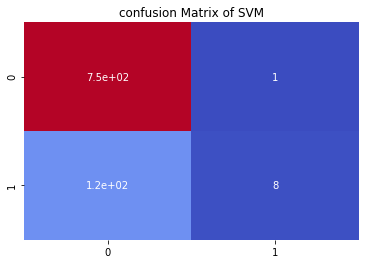

In [ ]:
#plotting confusion Matrix of svm
cm=confusion_matrix(y_test,predsvc)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("confusion Matrix of SVM")
plt.show()

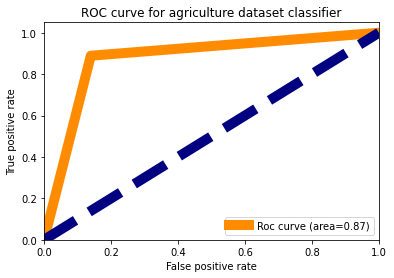

In [85]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predsvc, y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for agriculture dataset classifier')
plt.legend(loc="lower right")
plt.show()

**Saving our best Model**

In [ ]:
#save the model as a pickle file
import pickle
pickle.dump(svc, open('agriculture_train', 'wb'))

# **Using the Test dataset**

In [ ]:
#loading the test dataset
from google.colab import files
testuploaded = files.upload()

Saving testagriculture.csv to testagriculture (1).csv


In [ ]:
import io
test_ag= pd.read_csv(io.BytesIO(testuploaded['testagriculture.csv']))

In [ ]:
test_ag.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [ ]:
test_ag.shape

(1199, 9)

In [ ]:
#preprocessing pipeline
test_ag.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

we have to remove nan values

In [ ]:
test_ag['Number_Weeks_Used'] = test_ag['Number_Weeks_Used'].replace(np.nan, 0)

In [ ]:
test_ag.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

all nan values are removed

In [ ]:
#load the model
fitted_model=pickle.load(open('agriculture_train', 'rb'))

In [ ]:
fitted_model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#prediction over test data
predictions = fitted_model.predict(test_ag)

In [ ]:
predictions